#1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

#파이토치 시작하기

파이토치 시작하기

In [1]:
import torch 

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두개 만들고 행으로 병합, 열로 병합


In [2]:
X=torch.FloatTensor([[1.,2.,3.],
                     [4.,5.,6.],
                     [7.,8.,9.],
                     [10.,11.,12.]])
Y=torch.FloatTensor([[13.,14.,15.],
                     [16.,17.,18.],
                     [19.,20.,21.],
                     [22.,23.,24.]])
###행으로 병합 코드
print(torch.cat([X,Y],dim=0))
###열로 병합 코드
print(torch.cat([X,Y],dim=1))

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.],
        [13., 14., 15.],
        [16., 17., 18.],
        [19., 20., 21.],
        [22., 23., 24.]])
tensor([[ 1.,  2.,  3., 13., 14., 15.],
        [ 4.,  5.,  6., 16., 17., 18.],
        [ 7.,  8.,  9., 19., 20., 21.],
        [10., 11., 12., 22., 23., 24.]])


linear regression implementation from scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [3]:
# #Matplotlib 시각화 안될 때
# !pip uninstall matplotlib
# !pip install matplotlib==3.0.0

In [4]:
# !pip install d2l

In [5]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [6]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w))) #표준정규분포
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [7]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([0.4503, 0.8485]) 
label: tensor([5.5866])


In [8]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
     ###반복문으로 채워넣기:
    for i in range(0,num_examples,batch_size):
        ##이하는 반복문에 대한 조건입니다.
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [9]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.1368,  0.3520],
        [-0.0210,  0.8070],
        [ 0.0666,  1.1493],
        [-0.6285, -0.2532],
        [-1.2798, -0.4590],
        [-0.4853, -1.0555],
        [ 1.4074, -0.5917],
        [-0.7341,  1.9435],
        [-0.0967,  0.7706],
        [-0.4895, -0.5459],
        [ 0.2308, -0.5679],
        [ 1.7716, -1.0881],
        [ 1.7665,  0.7653],
        [ 0.3359,  0.7178],
        [ 0.4613, -0.7557],
        [-0.2326, -0.3169],
        [ 1.6939, -0.4679],
        [ 0.3376, -0.2706],
        [-0.8153, -0.2118],
        [-0.7869, -2.8041]]) 
 tensor([[ 4.5827],
        [ 4.2233],
        [ 3.9955],
        [ 3.9842],
        [ 2.3429],
        [ 5.6321],
        [10.6053],
        [ 0.3808],
        [ 4.0417],
        [ 4.8248],
        [ 7.0350],
        [12.4439],
        [ 9.6571],
        [ 5.4339],
        [ 8.0124],
        [ 5.2658],
        [11.2913],
        [ 6.9288],
        [ 3.3726],
        [ 7.3539]])


In [17]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# 가중치 초기화

In [11]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.mm(X, w) + b

In [12]:
def squared_loss(y_hat, y):  
    """Squared loss."""
    return (y_hat-y.reshape(y_hat.shape))**2/2 #미분 계산의 편의를 위해 2로 나눈다.

In [13]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad(): #pytorch의 autograd를 비활성화 >> 필요한 메모리 줄어듦
        for param in params:
            param -= lr * param.grad / batch_size #평균 gradient를 구하기 위해 batchsize로 나눈다.(param.grad = 배치의 gradient 합)
            param.grad.zero_() #루프가 끝나면 grad 초기화

In [18]:
lr = 0.01
num_epochs = 50
net = linreg
loss = squared_loss
b_list=[]
w_list=[] #cost graph에서 쓰기 위한 w_list
loss_list=[]  #cost graph에서 쓰기 위한 loss_list, b = torch.zeros(1, requires_grad=True) 초기화된 값으로 고정. w에 따른 Loss만 관찰

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b),y) 
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}, b {float(b)}, w{tuple(w)}')
        b_float = b.item()
        b_list.append(b_float)
        w_l = w.tolist() #텐서를 리스트로 변환해야만 value를 확인할 수 있음. 텐서는 value가 아닌 변수 자체를 참고하기 때문에 그냥 텐서를 넣으면 마지막 에폭의 값만 확인가능
        w_list.append(w_l)
        loss_list.append(float(loss(net(features,w,torch.zeros(1, requires_grad=True)),labels).mean()))

epoch 1, loss 2.732715, b 3.4989240169525146, w(tensor([1.9627], requires_grad=True), tensor([-0.9451], requires_grad=True))
epoch 2, loss 0.355208, b 4.771738529205322, w(tensor([2.6412], requires_grad=True), tensor([-1.2952], requires_grad=True))
epoch 3, loss 0.046271, b 5.234852313995361, w(tensor([2.8759], requires_grad=True), tensor([-1.4245], requires_grad=True))
epoch 4, loss 0.006079, b 5.403316020965576, w(tensor([2.9572], requires_grad=True), tensor([-1.4721], requires_grad=True))
epoch 5, loss 0.000836, b 5.4646406173706055, w(tensor([2.9853], requires_grad=True), tensor([-1.4896], requires_grad=True))
epoch 6, loss 0.000151, b 5.487069606781006, w(tensor([2.9950], requires_grad=True), tensor([-1.4960], requires_grad=True))
epoch 7, loss 0.000062, b 5.495182514190674, w(tensor([2.9983], requires_grad=True), tensor([-1.4984], requires_grad=True))
epoch 8, loss 0.000051, b 5.4981689453125, w(tensor([2.9994], requires_grad=True), tensor([-1.4993], requires_grad=True))
epoch 9,

In [19]:
w_list

[[[1.96273934841156], [-0.9451441168785095]],
 [[2.641185998916626], [-1.295163631439209]],
 [[2.875917434692383], [-1.424545407295227]],
 [[2.9571640491485596], [-1.4720702171325684]],
 [[2.9853169918060303], [-1.4896022081375122]],
 [[2.9949564933776855], [-1.4960085153579712]],
 [[2.998262643814087], [-1.49837327003479]],
 [[2.9993839263916016], [-1.4992523193359375]],
 [[2.9996910095214844], [-1.4995638132095337]],
 [[2.9999308586120605], [-1.4997040033340454]],
 [[2.9999053478240967], [-1.4996923208236694]],
 [[2.999910593032837], [-1.4997613430023193]],
 [[2.99999737739563], [-1.4997721910476685]],
 [[2.999997615814209], [-1.4997442960739136]],
 [[3.0000085830688477], [-1.4997470378875732]],
 [[3.000000238418579], [-1.4997279644012451]],
 [[3.0000736713409424], [-1.4997504949569702]],
 [[3.000009298324585], [-1.4996613264083862]],
 [[2.9999613761901855], [-1.4997023344039917]],
 [[2.9999122619628906], [-1.4996706247329712]],
 [[2.9999759197235107], [-1.499794602394104]],
 [[2.999

In [20]:
loss_list

[15.893275260925293,
 15.232109069824219,
 15.14199161529541,
 15.127923965454102,
 15.1251802444458,
 15.124505996704102,
 15.124309539794922,
 15.124248504638672,
 15.124232292175293,
 15.12421989440918,
 15.124221801757812,
 15.124223709106445,
 15.124216079711914,
 15.124216079711914,
 15.124216079711914,
 15.124215126037598,
 15.124211311340332,
 15.124213218688965,
 15.124217987060547,
 15.12421989440918,
 15.124218940734863,
 15.124222755432129,
 15.124221801757812,
 15.124216079711914,
 15.12421989440918,
 15.124215126037598,
 15.12421703338623,
 15.124214172363281,
 15.124217987060547,
 15.124215126037598,
 15.124210357666016,
 15.124215126037598,
 15.124218940734863,
 15.124215126037598,
 15.124217987060547,
 15.124215126037598,
 15.12421703338623,
 15.124220848083496,
 15.124224662780762,
 15.124222755432129,
 15.124218940734863,
 15.12421703338623,
 15.124220848083496,
 15.124221801757812,
 15.124221801757812,
 15.124213218688965,
 15.124212265014648,
 15.12421703338623,
 1

In [21]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([-1.7643e-05, -2.4223e-04], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0001], grad_fn=<RsubBackward1>)


+cost graph 그리기 (x축 w, y축 loss)

In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
w1_array = np.array([i[0][0] for i in w_list])

In [24]:
w2_array = np.array([i[1][0] for i in w_list])

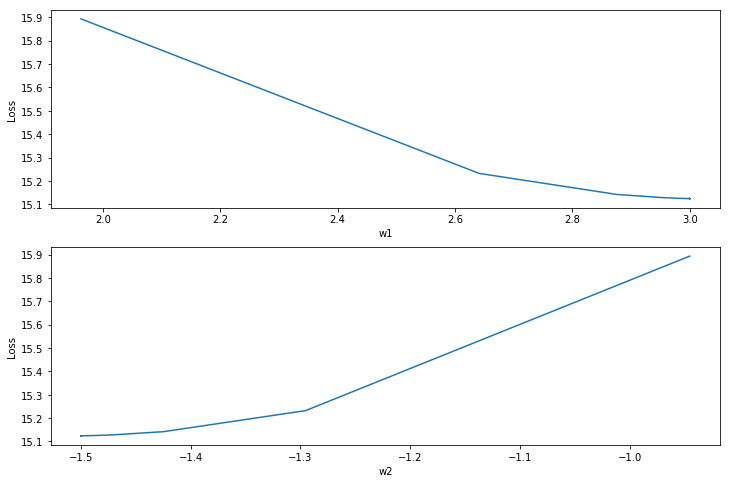

In [25]:
plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
plt.plot(w1_array,loss_list)
plt.ylabel("Loss")
plt.xlabel("w1")

plt.subplot(2,1,2)
plt.plot(w2_array,loss_list)
plt.ylabel("Loss")
plt.xlabel("w2")

plt.show()

concise implementation of linear regression 
- api 사용해보기

In [26]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [27]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [28]:
next(iter(data_iter))

[tensor([[-0.4779,  1.0665],
         [ 0.1692, -1.6408],
         [ 0.3332,  1.0185],
         [-1.0592,  1.0012],
         [ 0.0942,  0.4977],
         [ 0.6279, -0.9459],
         [ 0.9635, -1.5066],
         [-0.0135,  0.0862],
         [ 0.5307,  1.1346],
         [ 0.7485,  0.3992],
         [ 1.5521, -0.2228],
         [-0.3450, -0.5345],
         [ 0.8566,  0.0768],
         [-1.7271,  0.8936],
         [-0.3986,  1.3546],
         [-0.6037, -0.1265],
         [ 0.6958, -0.8207],
         [ 1.2514,  1.0200],
         [-0.5549,  1.1484],
         [-0.2204,  0.9428]]), tensor([[ 2.4809],
         [ 8.4501],
         [ 4.9710],
         [ 0.8252],
         [ 5.0456],
         [ 8.8046],
         [10.6440],
         [ 5.3315],
         [ 5.3946],
         [ 7.1356],
         [10.4912],
         [ 5.2783],
         [ 7.9425],
         [-1.0051],
         [ 2.2676],
         [ 3.8708],
         [ 8.8344],
         [ 7.7103],
         [ 2.1100],
         [ 3.4204]])]

In [29]:
from torch import nn
#선형회귀모델 nn.Linear(size of each input sample, size of each output sample)
net = nn.Sequential(nn.Linear(2,1))

In [30]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0) #w1,b 초기값 설정

tensor([0.])

In [31]:
loss = nn.MSELoss()

In [32]:
trainer = torch.optim.SGD(net.parameters(),lr=0.01)

In [33]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X),y)
        trainer.zero_grad() #grad 초기화
        #역전파: grad 계산
        l.backward()
        #가중치 업데이트
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.778801
epoch 2, loss 0.015350
epoch 3, loss 0.000401


In [34]:
w = net[0].weight.data #역전파 이후 update된 가중치
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data 
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 0.0114, -0.0036])
error in estimating b: tensor([0.0136])
